## Data Preparation
Data preparation is the process of cleaning, transforming, and enriching raw data into a desired format for better decision-making in less time. It is a crucial step before processing and analyzing data to ensure that the data is accurate, consistent, and complete.

### 1. Load Modules & Dataset

In [1]:
# 1. Load Modules & Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
try:
    edu_df = pd.read_csv("education.csv")
    labour_df = pd.read_csv("labour.csv")
    print("Files loaded successfully!")
except FileNotFoundError as e:
    print(e)

Files loaded successfully!


In [2]:
# 2. Initial Inspection
print("--- Education Data Info ---")
edu_df.info()

--- Education Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332 entries, 0 to 1331
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   STRUCTURE               1332 non-null   object 
 1   STRUCTURE_ID            1332 non-null   object 
 2   ACTION                  1332 non-null   object 
 3   FREQ                    1332 non-null   object 
 4   FREQ_LABEL              1332 non-null   object 
 5   REF_AREA                1332 non-null   object 
 6   REF_AREA_LABEL          1332 non-null   object 
 7   INDICATOR               1332 non-null   object 
 8   INDICATOR_LABEL         1332 non-null   object 
 9   SEX                     1332 non-null   object 
 10  SEX_LABEL               1332 non-null   object 
 11  AGE                     1332 non-null   object 
 12  AGE_LABEL               1332 non-null   object 
 13  URBANISATION            1332 non-null   object 
 14  URBANISATION

In [3]:
print("\n--- Labour Data Info ---")
labour_df.info()


--- Labour Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8216 entries, 0 to 8215
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   STRUCTURE               8216 non-null   object 
 1   STRUCTURE_ID            8216 non-null   object 
 2   ACTION                  8216 non-null   object 
 3   FREQ                    8216 non-null   object 
 4   FREQ_LABEL              8216 non-null   object 
 5   REF_AREA                8216 non-null   object 
 6   REF_AREA_LABEL          8216 non-null   object 
 7   INDICATOR               8216 non-null   object 
 8   INDICATOR_LABEL         8216 non-null   object 
 9   SEX                     8216 non-null   object 
 10  SEX_LABEL               8216 non-null   object 
 11  AGE                     8216 non-null   object 
 12  AGE_LABEL               8216 non-null   object 
 13  URBANISATION            8216 non-null   object 
 14  URBANISATION_L

In [4]:
# 3. Clean and Filter Data

# Filter for South Africa
edu_sa = edu_df[edu_df["REF_AREA_LABEL"] == "South Africa"].copy()
labour_sa = labour_df[labour_df["REF_AREA_LABEL"] == "South Africa"].copy()

In [5]:
print(f"\nFound {len(edu_sa)} rows for South Africa in the education dataset.")
print(f"Found {len(labour_sa)} rows for South Africa in the labour dataset.")


Found 13 rows for South Africa in the education dataset.
Found 35 rows for South Africa in the labour dataset.


In [6]:
# Select relevant columns and rename them for easier use
columns_to_keep = {
    "TIME_PERIOD": "Year",
    "INDICATOR_LABEL": "Indicator",
    "SEX_LABEL": "Sex",
    "AGE_LABEL": "Age",
    "OBS_VALUE": "Value"
}

edu_clean = edu_sa[list(columns_to_keep.keys())].rename(columns=columns_to_keep)
labour_clean = labour_sa[list(columns_to_keep.keys())].rename(columns=columns_to_keep)

In [7]:
# 4. Handle Missing Values
print("\n--- Checking for missing values in cleaned Education data ---")
print(edu_clean.isnull().sum())


--- Checking for missing values in cleaned Education data ---
Year         0
Indicator    0
Sex          0
Age          0
Value        0
dtype: int64


In [8]:
print("\n--- Checking for missing values in cleaned Labour data ---")
print(labour_clean.isnull().sum())


--- Checking for missing values in cleaned Labour data ---
Year         0
Indicator    0
Sex          0
Age          0
Value        0
dtype: int64


In [9]:
# 5. Generate Descriptive Statistics and Insights
print("\n--- Descriptive Statistics for Education Data (South Africa) ---")
print(edu_clean.describe())


--- Descriptive Statistics for Education Data (South Africa) ---
              Year      Value
count    13.000000  13.000000
mean   2016.846154   8.306698
std       4.140172   2.775010
min    2010.000000   4.839276
25%    2014.000000   6.038021
50%    2017.000000   8.020000
75%    2020.000000  11.108956
max    2023.000000  12.960000


In [10]:
print("\n--- Descriptive Statistics for Labour Data (South Africa) ---")
print(labour_clean.describe())


--- Descriptive Statistics for Labour Data (South Africa) ---
              Year      Value
count    35.000000  35.000000
mean   2007.000000  59.423029
std      10.246951   2.574678
min    1990.000000  54.171000
25%    1998.500000  57.829000
50%    2007.000000  59.802000
75%    2015.500000  61.985500
max    2024.000000  62.569000


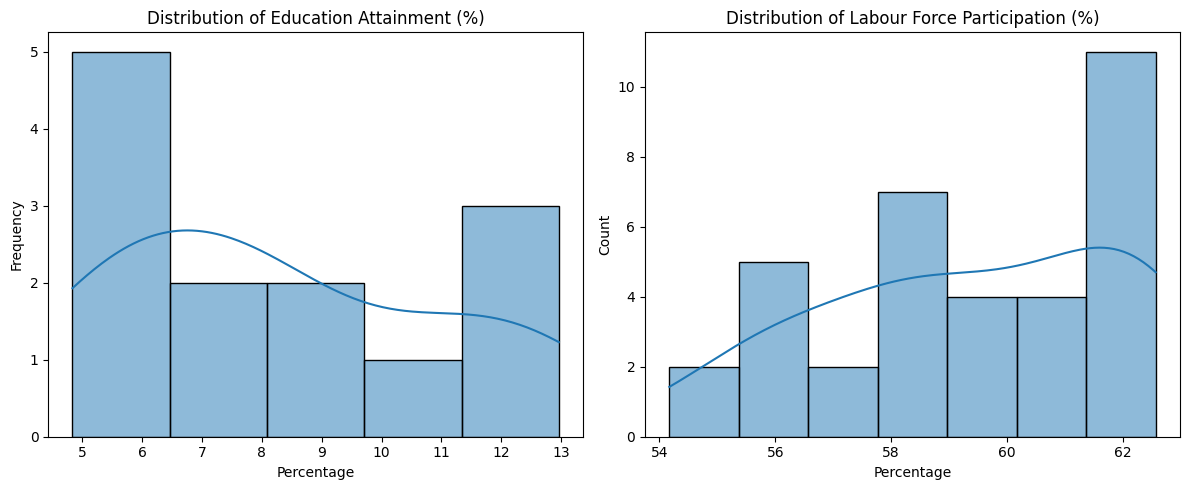

In [11]:
# Initial Visual Insight
plt.figure(figsize=(12, 5))

# Histogram for Education values
plt.subplot(1, 2, 1)
sns.histplot(edu_clean['Value'], kde=True)
plt.title('Distribution of Education Attainment (%)')
plt.xlabel('Percentage')
plt.ylabel('Frequency')

# Histogram for Labour values
plt.subplot(1, 2, 2)
sns.histplot(labour_clean['Value'], kde=True)
plt.title('Distribution of Labour Force Participation (%)')
plt.xlabel('Percentage')

plt.tight_layout()
plt.show()